## Get the text

In [1]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11689 sha256=cee2c98c199bad883980bac656ff500df70126bdf13117cdfb70294cf67401fc
  Stored in directory: c:\users\taher\appdata\local\pip\cache\wheels\15\93\6d\5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [2]:
import wikipedia

pages = ["Software engineer", "Software engineering", "Engineering", "Software development", "Software", "Computing"]

text = ""
for page in pages : 
    wiki = wikipedia.page(page)
    text += wiki.content
text

'A software engineer is a person who applies the principles of software engineering to the design, development, maintenance, testing, and evaluation of computer software.\nPrior to the mid-1970s, software practitioners generally called themselves computer scientists, computer programmers or software developers, regardless of their actual jobs. Many people prefer to call themselves software developer and programmer, because most widely agree what these terms mean, while the exact meaning of software engineer is still being debated.\n\n\n== Education ==\nHalf of all practitioners today have degrees in computer science, information systems, or information technology. A small, but growing, number of practitioners have software engineering degrees. In 1987, the Department of Computing at Imperial College London introduced the first three-year software engineering Bachelor\'s degree in the UK and the world; in the following year, the University of Sheffield established a similar program.  In

In [3]:
import re
text = re.sub(r'==.*?==+', ' ', text)
text = text.replace('\n', ' ')
text

'A software engineer is a person who applies the principles of software engineering to the design, development, maintenance, testing, and evaluation of computer software. Prior to the mid-1970s, software practitioners generally called themselves computer scientists, computer programmers or software developers, regardless of their actual jobs. Many people prefer to call themselves software developer and programmer, because most widely agree what these terms mean, while the exact meaning of software engineer is still being debated.     Half of all practitioners today have degrees in computer science, information systems, or information technology. A small, but growing, number of practitioners have software engineering degrees. In 1987, the Department of Computing at Imperial College London introduced the first three-year software engineering Bachelor\'s degree in the UK and the world; in the following year, the University of Sheffield established a similar program.  In 1996, the Rocheste

In [ ]:
len(text.split())

19307

In [ ]:
text[-100:]

'ctronic data processing Creative computing          FOLDOC: the Free On-Line Dictionary Of Computing'

## Plotting wordcloud

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [5]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

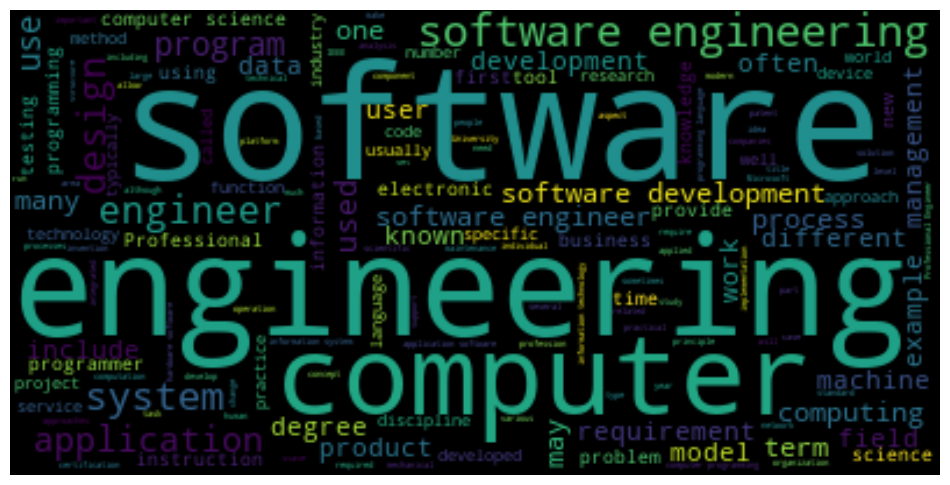

In [6]:
wc = WordCloud()
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Removing stopwords makes it better

In [7]:
from wordcloud import STOPWORDS

In [ ]:
wc = WordCloud(background_color="white", max_words=10000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Mask based on image

In [8]:
from PIL import Image
import numpy as np

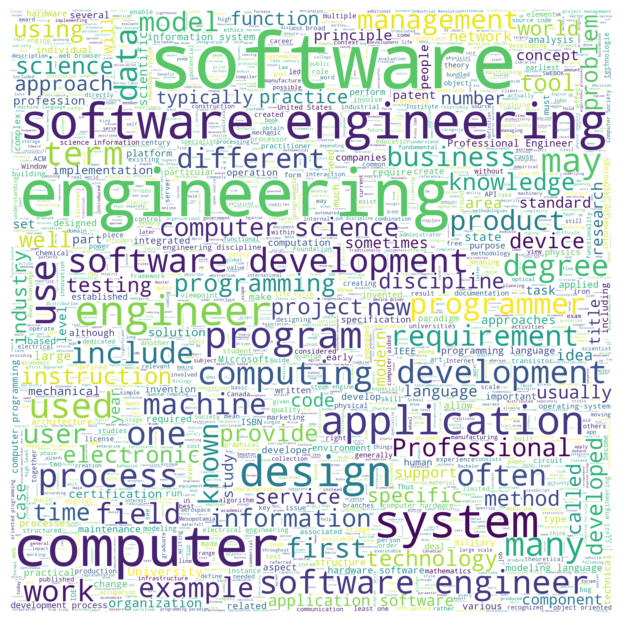

In [ ]:
mask = np.array(Image.open('bestpdp2.jpg'))
font_path = "./BebasNeue-Regular"

wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Custom color function

In [ ]:
def color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 40 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

## Generate colors based on the mask

In [3]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('bestpdp2.jpg'))

mask_colors = ImageColorGenerator(mask)

wc = WordCloud(# stopwords=STOPWORDS, #font_path=font_path,
               mask=mask, background_color="white",
               max_words=10000, max_font_size=128,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=mask_colors)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

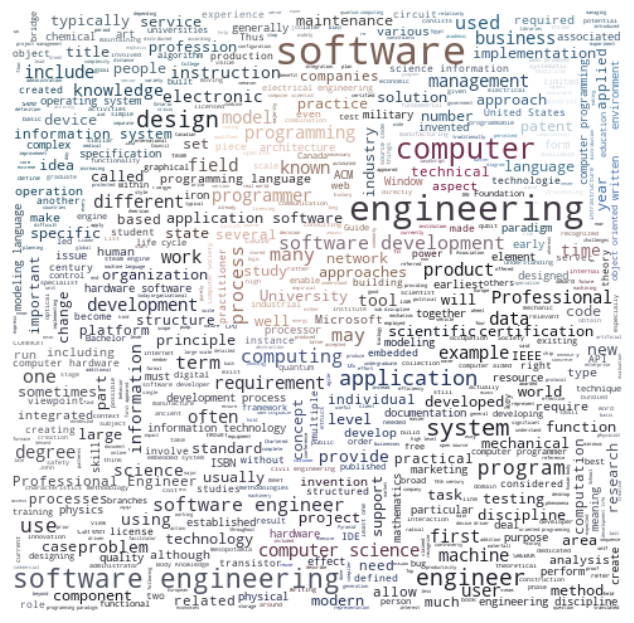

In [ ]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('bestpdp.jpg'))

mask_colors = ImageColorGenerator(mask)

wc = WordCloud(# stopwords=STOPWORDS, #font_path=font_path,
               mask=mask, background_color="white",
               max_words=10000, max_font_size=32,
               random_state=42, width=mask.shape[1] * 2,
               height=mask.shape[0] * 2, color_func=mask_colors)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

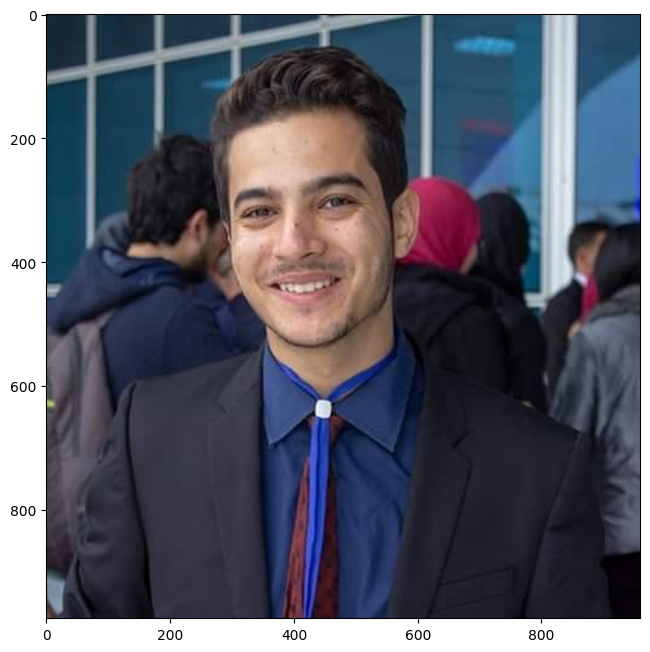

In [ ]:
import cv2
import numpy as np

mask_times2 = cv2.resize(mask, dsize=(mask.shape[0] * 2, mask.shape[1] * 2), interpolation=cv2.INTER_CUBIC)
plt.imshow(mask_times2)

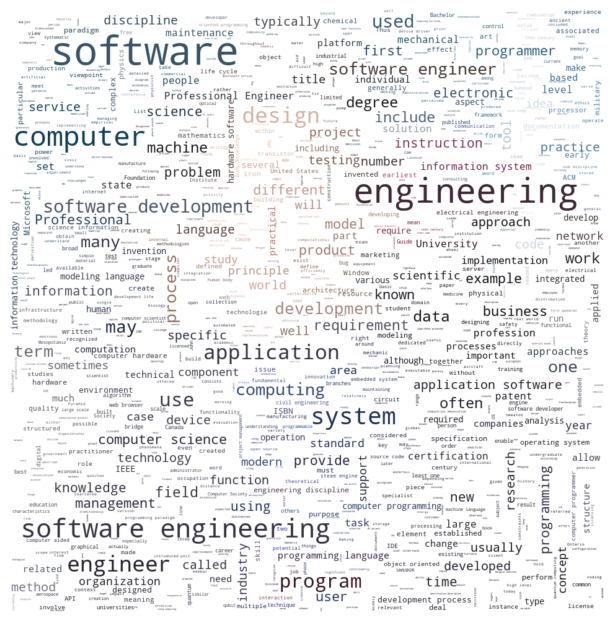

In [ ]:
from wordcloud import ImageColorGenerator

mask_colors = ImageColorGenerator(mask_times2)

wc = WordCloud(stopwords=STOPWORDS, #font_path=font_path,
               mask=mask_times2, background_color="white",
               max_words=20000, max_font_size=64,
               random_state=42, width=mask_times2.shape[1],
               height=mask_times2.shape[0], color_func=mask_colors)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Masking the image

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

Adjust brightness

In [ ]:
import cv2

def brighten(img) :
    cols, rows = img.shape

    brightness = np.sum(img) / (255 * cols * rows)
    minimum_brightness = 0.5

    ratio = brightness / minimum_brightness
    if ratio >= 1:
        print("Image already bright enough")
        return img

    # Otherwise, adjust brightness to get the target brightness
    return cv2.convertScaleAbs(img, alpha = 1 / ratio, beta = 0)

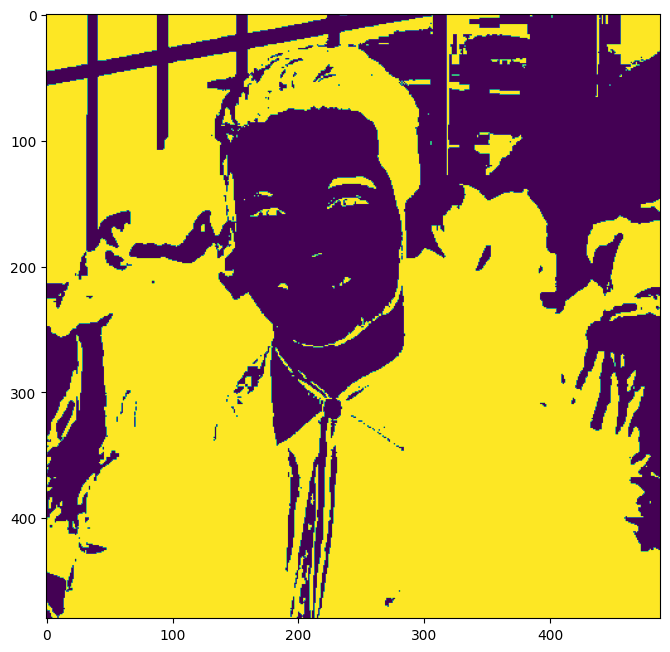

In [ ]:
def masken_img(img) :
    gray = rgb2gray(img)
    bright = brighten(gray)
    plt.imshow(bright)
    bwmask = ((bright / 255) < 0.5 ).astype(int)
    return bwmask

bwmask = masken_img(mask)
plt.imshow(bwmask) 

In [ ]:
(rgb2gray(mask) / 255) > 0.5

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])